this notebook implements the Neural-style algorthim that is outlined in the paper, Image Style Transfer Using Convolutional Neural Networks, by Gatys (https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf) using Pytorch. Neural-Style, or Neural-Transfer, allows you to take an image and reproduce it with a new artistic style. The algorithm takes three images, an input image, a content-image, and a style-image, and changes the input to resemble the content of the content-image and the artistic style of the style-image.

In [15]:
#import the required packages
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import copy
#python file that has all the functions needed 
from utils import *
from torchvision.utils import save_image

In [16]:
#run the network on the GPU 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device being used:', device)

Device being used: cuda


# Load Images To Tensor

In [19]:
imsize = 400 if torch.cuda.is_available() else 128  # use small size if no gpu
# imsize equals 1 digit if the image is a square 
# if image not a square and want to maintain aspect ratio then do imsize = [w, h] where w is the width and h is the height of the image 

#loader that transforms image to tensor to be readable by the network
loader = transforms.Compose([
    transforms.Resize(imsize),
    transforms.ToTensor() ])

def image_loader(image): 
    image = Image.open(image)
    image=loader(image).unsqueeze(0) #add a fake batch dimension to fit network's input dimensions
    return image.to(device, torch.float)

#images can be found in the images folder 
style_img = image_loader('./images/img6.jpg') # the image to replicate the style of
content_img = image_loader('./images/umb.jpg') # the image that will adapt the other image's style 

assert style_img.size()== content_img.size() # make sure both images have the same size 


# Display Images

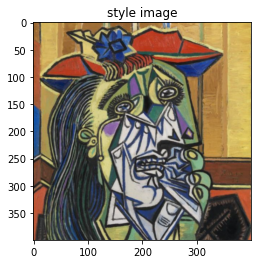

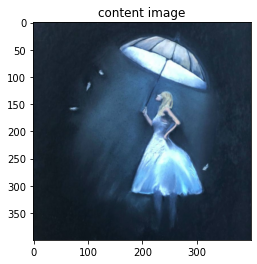

In [20]:
# a function to display the images 
unloader =transforms.ToPILImage() #transforms images from Tensor back to PIL to display them 

plt.ion()

def imshow(tensor, title='image'):
    image = tensor.cpu().clone() #clone the tensor so it does not change
    image = image.squeeze(0) # remove the fake batch dimension 
    image = unloader(image)
    plt.imshow(image)
    plt.title(title)
    plt.pause(0.001)

plt.figure()
imshow(style_img, title ='style image')

plt.figure()
imshow(content_img, title ='content image')


# Load Model 

VGG is a module that is divdied into two child sequential modules: features and classifier. For our purposes, we'll use features module. We can do so by calling .eval() which will freeze all the parameters since we're only interested in optimizing the target image. 

In [21]:
#import model 
cnn = models.vgg19(pretrained=True).features.to(device).eval()

#helper variables to transform image to fit the network
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

input_img = content_img.clone()

Let's print the model to showcase what kind of layers we're working with 

In [22]:
print(cnn)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

# Displaying the Output Image

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 152.139236 Content Loss: 20.452183

run [100]:
Style Loss : 48.450214 Content Loss: 20.962484

run [150]:
Style Loss : 22.434982 Content Loss: 21.006742

run [200]:
Style Loss : 12.558764 Content Loss: 20.537519

run [250]:
Style Loss : 7.337723 Content Loss: 19.968222

run [300]:
Style Loss : 4.997455 Content Loss: 19.328341



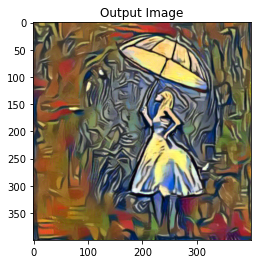

In [23]:

# function that will return the content_img in the style of style_img
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
#imshow(style_img, title ='style image')
#imshow(content_img, title ='content image')

imshow(output, title='Output Image')

plt.ioff()
plt.show()

#save image as jpg file
#images will be saved in the outputimages folder
save_image(output, './outputimages/neural3.jpg')